In [1]:
# Optimization Methods using TensorFlow/Keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
# Set random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# Load and prepare dataset
X,Y = make_moons(n_samples=1000,noise=0.2)
Y=Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [4]:
# Define the model architecture using Keras Sequential API
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=10,activation='tanh',input_shape=(2,)),
      tf.keras.layers.Dense(units=5,activation='tanh'),
      tf.keras.layers.Dense(units=1,activation='sigmoid')
  ])

  return model

In [5]:
def train_with_optimizer(optimizer_name):
  print(f"Train with optimizer: {optimizer_name}\n")
  model=create_model()
  model.compile(optimizer=optimizer_name,loss='binary_crossentropy',metrics=['accuracy'])
  history=model.fit(X_train,Y_train,epochs=100,batch_size=64,verbose=0)
  loss,acc=model.evaluate(X_test,Y_test,verbose=0)
  print(f"Test Accuracy with {optimizer_name}: {acc:0.2f}\n")
  return history, model

In [6]:
# Try different optimization methods
optimizers = ['sgd','momentum','adam']
histories={}
for opt in optimizers:
  if opt == 'momentum':
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
  else:
    optimizer=opt
  history,_=train_with_optimizer(optimizer)
  histories[opt]=history

Train with optimizer: sgd



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with sgd: 0.89

Train with optimizer: <keras.src.optimizers.sgd.SGD object at 0x7cd24f5cec10>



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with <keras.src.optimizers.sgd.SGD object at 0x7cd24f5cec10>: 0.94

Train with optimizer: adam



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with adam: 0.93



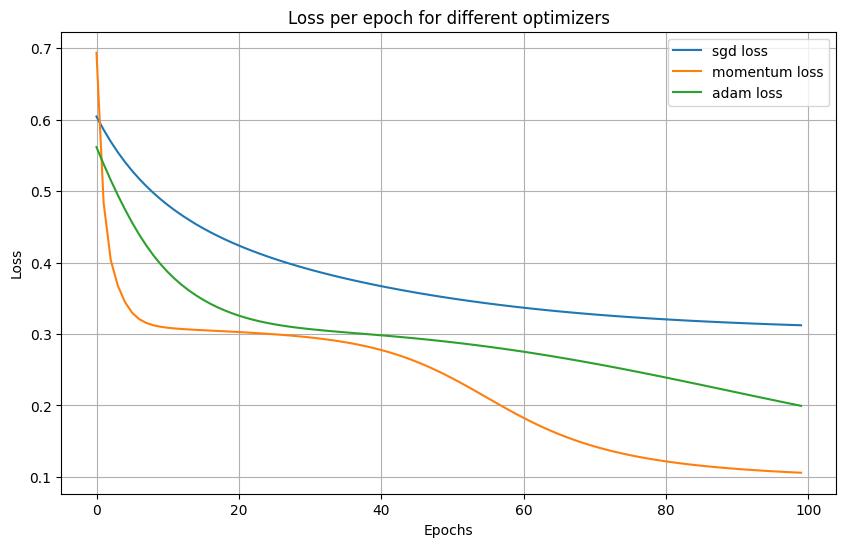

In [7]:
# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt, hist in histories.items():
    plt.plot(hist.history['loss'], label=f"{opt} loss")
plt.title("Loss per epoch for different optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()